In [16]:
import numpy as np

import matplotlib.pyplot as plt

import shap

import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

In [17]:
# Generate synthetic dataset

X,y = make_regression(
    n_samples = 500,
    n_features=10,
    noise=0.1,
    random_state=42
)

In [18]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [19]:
# Train an XGBoost model

model = xgb.XGBRegressor(n_estimators = 100, learning_rate =0.1, max_depth = 3, random_state =42)

In [20]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [21]:
# Explain the model using SHAP

explainer = shap.Explainer(model)

shap_values = explainer(X_test)

In [22]:
# Compute SHAP interaction values

shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_test)

In [24]:
print(f"X_test shape: {X_test.shape}")
print(f"shap_interaction_values shape: {shap_interaction_values.shape}")

X_test shape: (150, 10)
shap_interaction_values shape: (150, 10, 10)


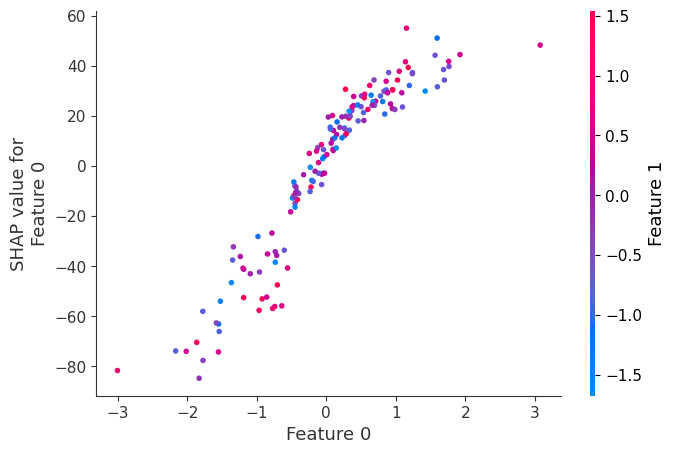

In [26]:
# Plot interaction values for a specific feature

feature_index = 0  # Change index to see different feature interactions

# Extract SHAP values as an array (use .values attribute)
shap_values_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# Pass the extracted values to dependence_plot
shap.dependence_plot(feature_index, shap_values_array, X_test, display_features=X_test)

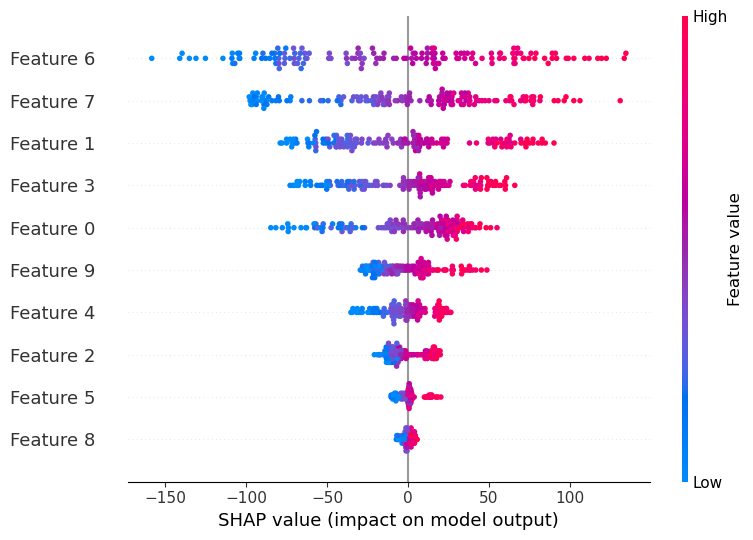

In [27]:
# Summary plot to visualize feature importance

shap.summary_plot(shap_values, X_test)